# MatPlotLib: Scatter Plots

In [14]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [18]:
df = df[df['job_title_short'] == 'Data Analyst']

df_exploded = df.explode('job_skills')
df_exploded.groupby('job_skills').size()

job_skills
airflow       2002
airtable        88
alteryx       4570
angular        376
angular.js       2
              ... 
wrike           39
wsl             16
xamarin          2
yarn            76
zoom           465
Length: 235, dtype: int64

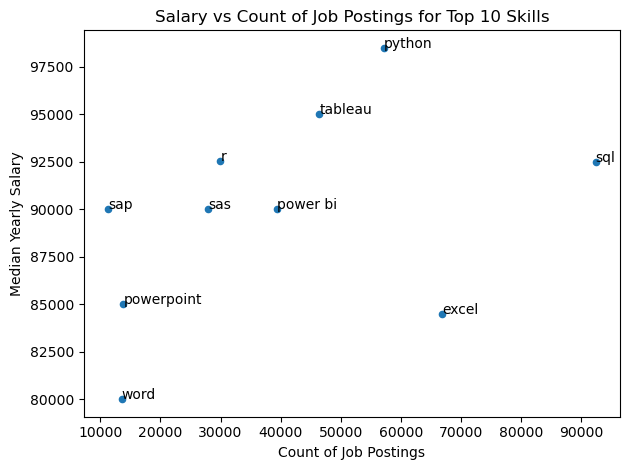

In [28]:
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs Count of Job Postings for Top 10 Skills')
plt.tight_layout()
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.show()